# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Using UCLA admissions data, determine how likely students will be admitted into graduate school using gre, gpa and school prestige data.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: There were 400 objervations in our dataset.  After dropping missing data from the analysis, the final data set contained 397 objervations.

### Demo: Provide a table that explains the data by admission status

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df_raw = pd.read_csv("assets/admissions.csv")
df = df_raw.dropna() 

df_tab=pd.crosstab(index=df["admit"],columns=df["prestige"],margins=True)
df_tab.columns = ["1","2","3","4","rowtotal"]
df_tab.index= ["0","1","coltotal"]
#crosstab for admit and prestige - frequency
print(df_tab)
#crosstab for admit and prestige - percentage
print(df_tab/df_tab.ix["coltotal","rowtotal"])

dummy_ranks=pd.get_dummies(df['prestige'],prefix='prestige')
cols_to_keep=['admit','gre','gpa']
data=df[cols_to_keep].join(dummy_ranks)
#group by admit and get mean and standard deviation
data.groupby('admit').describe()

           1    2    3   4  rowtotal
0         28   95   93  55       271
1         33   53   28  12       126
coltotal  61  148  121  67       397
                 1         2         3         4  rowtotal
0         0.070529  0.239295  0.234257  0.138539   0.68262
1         0.083123  0.133501  0.070529  0.030227   0.31738
coltotal  0.153652  0.372796  0.304786  0.168766   1.00000


gpa         gre  prestige_1.0  prestige_2.0  prestige_3.0  \
admit                                                                           
0     count  271.000000  271.000000    271.000000    271.000000    271.000000   
      mean     3.347159  573.579336      0.103321      0.350554      0.343173   
      std      0.376355  116.052798      0.304941      0.478026      0.475647   
      min      2.260000  220.000000      0.000000      0.000000      0.000000   
      25%      3.080000  500.000000      0.000000      0.000000      0.000000   
      50%      3.340000  580.000000      0.000000      0.000000      0.000000   
      75%      3.610000  660.000000      0.000000      1.000000      1.000000   
      max      4.000000  800.000000      1.000000      1.000000      1.000000   
1     count  126.000000  126.000000    126.000000    126.000000    126.000000   
      mean     3.489206  618.571429      0.261905      0.420635      0.222222   
      std      0.371655  109.257233      0.441426      0.495632      0.417399   
      min      2.420000  300.000000      0.000000      0.000000      0.000000   
      25%      3.220000  540.000000      0.000000      0.000000      0.000000   
      50%      3.545000  620.000000      0.000000      0.000000      0.000000   
      75%      3.757500  680.000000      1.000000      1.000000      0.000000   
      max      4.000000  800.000000      1.000000      1.000000      1.000000   

             prestige_4.0  
admit                      
0     count    271.000000  
      mean       0.202952  
      std        0.402941  
      min        0.000000  
      25%        0.000000  
      50%        0.000000  
      75%        0.000000  
      max        1.000000  
1     count    126.000000  
      mean       0.095238  
      std        0.294715  
      min        0.000000  
      25%        0.000000  
      50%        0.000000  
      75%        0.000000  
      max        1.000000

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA|3.347(0.376)|3.489(0.371)
GRE|573.579(116.052)|618.571(109.257)
Prestige 1|28(7%)|33(8%)
Prestige 2|95(23%)|53(13%)
Prestige 3|93(23%)|28(7%)
Prestige 4|55(13%)|12(3%)

### Methods: Write up the methods used in your analysis

Answer: Completed a logistic regression using Statsmodels.  The Ggoal was to identify the various factors that may influence admission into graduate school.  Dummy variables were created so that the prestige categorical variable can be used with logistic regression.

### Results: Write up your results

Answer: There is an inverse relationship between the probability of being admitted and the prestige of a candidate's undergraduate school.  The probability of being accepted into a graduate school is higher for students from a high prestige undergraduate school.

### Visuals: Provide a table or visualization of these results

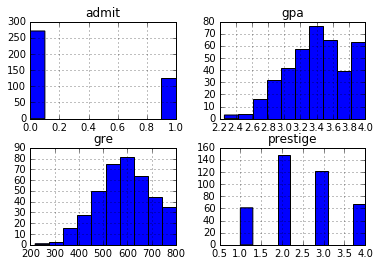

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Jul 2016   Pseudo R-squ.:                 0.08166
Time:                        21:52:15   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793

In [6]:
df.hist()
pl.show()

data['intercept'] = 1.0
train_cols=data.columns[1:]
logit=sm.Logit(data['admit'],data[train_cols])
result=logit.fit()
print(result.summary())

### Discussion: Write up your discussion and future steps

Answer: 